In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.table import Table
from astropy.coordinates import Angle, SkyCoord
import astropy.units as u
import seaborn as sns
import splat
pd.options.display.max_columns = 999
pd.options.display.max_rows = 999
%matplotlib inline

In [28]:
dl17plx = pd.read_csv('/Users/daniella/Research/Relations/Dupuy_Liu_plx.txt',comment='#',delim_whitespace=True,header=0)

In [29]:
dl17plx.columns

Index(['Name', 'OptSpT', 'NIRSpT', 'SpTRefs', 'flag', 'RA(deg)', 'Dec(deg)',
       'Epoch(JD)', 'plx', 'eplx', 'PMtot', 'ePM', 'PM_PA', 'ePA', 'PlxRef',
       'gmag', 'egmag', 'rmag', 'ermag', 'imag', 'eimag', 'zmag', 'ezmag',
       'Ref', 'Ymag', 'eYmag', 'a', 'Jmag', 'eJmag', 'b', 'Hmag', 'eHmag', 'c',
       'Kmag', 'eKmag', 'd', 'Lmag', 'eLmag', 'e', 'Mmag', 'eMmag', 'f',
       'J2mag', 'eJ2mag', 'g', 'H2mag', 'eH2mag', 'h', 'K2mag', 'eK2mag', 'I',
       'MKO+2MASSRefs', 'CH1mag', 'eCH1mag', 'CH2mag', 'eCH2mag', 'CH3mag',
       'eCH3mag', 'CH4mag', 'eCH4mag', 'W1mag', 'eW1mag', 'W2mag', 'eW2mag',
       'W3mag', 'eW3mag', 'W4mag', 'eW4mag', 'nb', 'na', 'cc', 'ext', 'var',
       'qual', 'MIRRefs', 'sysID', 'bin', 'compsep(")', 'HST/AO', 'Refs',
       'Optgrav', 'Ref.1', 'IRgrav', 'Ref.2'],
      dtype='object')

In [30]:
dl17plx = dl17plx.apply(pd.to_numeric, errors='ignore')

In [31]:
dl17plx['spt'] = dl17plx['OptSpT']
dl17plx['spt'][dl17plx['spt'].isnull()] = dl17plx['NIRSpT'][dl17plx['spt'].isnull()]
dl17plx['sptn'] = dl17plx['spt'].map(lambda x: splat.typeToNum(x))
dl17plx['ch1-ch2'] = dl17plx['CH1mag'] - dl17plx['CH2mag']
dl17plx['ch1-ch2e'] = np.sqrt(dl17plx['eCH1mag']**2 + dl17plx['eCH2mag']**2)

In [42]:
def absmag(appmag, appmage, plx, plxe): #plx in mas
    M = appmag + 5 - 5*np.log10(1000./plx)
    Me = np.sqrt(appmage**2 + (5*plxe/(plx*np.log(10)))**2)
    return [M,Me]

In [43]:
dl17plx['MH'], dl17plx['MHe'] = absmag(dl17plx['Hmag'],dl17plx['eHmag'],dl17plx['plx'],dl17plx['eplx'])
dl17plx['Mch2'], dl17plx['Mch2e'] = absmag(dl17plx['CH2mag'],dl17plx['eCH2mag'],dl17plx['plx'],dl17plx['eplx'])
dl17plx['H-W1'] = dl17plx['Hmag'] - dl17plx['W1mag']
dl17plx['H-W1e'] = np.sqrt(dl17plx['eHmag']**2 + dl17plx['eW1mag']**2)

In [44]:
k19t7 = pd.read_csv('/Users/daniella/Research/Relations/kirkpatrick2019_tab7.txt',comment='#',delim_whitespace=True)
k19t7 = k19t7.replace('cdots',np.nan)

In [45]:
k19t7 = k19t7.apply(pd.to_numeric,errors='ignore')

In [46]:
k19t7['sptn'] = k19t7['sptn']+30
k19t7['H-W1'] = k19t7['M_H'] - k19t7['M_W1']

In [47]:
k19t7['ch1-ch2'] = k19t7['M_ch1'] - k19t7['M_ch2']
k19t7['ch1-ch2e'] = np.sqrt(k19t7['M_ch1e']**2 + k19t7['M_ch2e']**2)

In [48]:
dl17plx['sptn'].min(), k19t7['sptn'].max()

(15.0, 44.0)

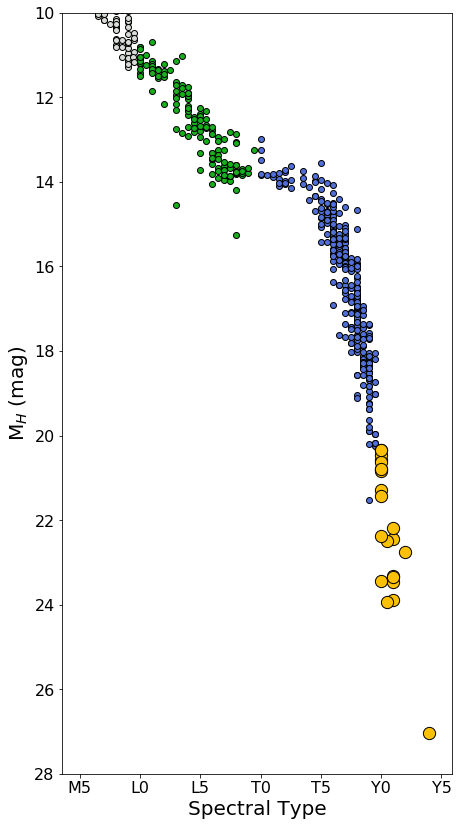

In [49]:
m = dl17plx[dl17plx['sptn'] < 20].index
l = dl17plx[(dl17plx['sptn'] < 30) & (dl17plx['sptn'] >= 20)].index
t = dl17plx[(dl17plx['sptn'] < 40) & (dl17plx['sptn'] >= 30)].index
tt = k19t7[(k19t7['sptn'] < 40) & (k19t7['sptn'] >= 30)].index
y = k19t7[k19t7['sptn'] >= 40].index

plt.figure(figsize=(7,14))
plt.scatter(dl17plx.loc[m,'sptn'],dl17plx.loc[m,'MH'],marker='o', color=sns.xkcd_rgb['light grey'], edgecolor='k')#color=sns.xkcd_rgb['denim blue']
plt.scatter(dl17plx.loc[l,'sptn'],dl17plx.loc[l,'MH'],marker='o', color=sns.xkcd_rgb['green'], edgecolor='k')#color=sns.xkcd_rgb['kelly green']
plt.scatter(dl17plx.loc[t,'sptn'],dl17plx.loc[t,'MH'],marker='o', color=sns.xkcd_rgb['cornflower blue'], edgecolor='k')#color=sns.xkcd_rgb['marigold']
plt.scatter(k19t7.loc[tt,'sptn'], k19t7.loc[tt,'M_H'],marker='o', color=sns.xkcd_rgb['cornflower blue'], edgecolor='k')#color=sns.xkcd_rgb['light orange']
plt.scatter(k19t7.loc[y,'sptn'], k19t7.loc[y,'M_H'],marker='o', color=sns.xkcd_rgb['marigold'], edgecolor='k', s=150)#color=sns.xkcd_rgb['red']
plt.ylim(28,10)
plt.xlabel('Spectral Type',fontsize=20)
plt.ylabel('M$_H$ (mag)',fontsize=20)
plt.xticks(np.arange(7)*5+15,['M5','L0','L5','T0','T5','Y0','Y5'],fontsize=16)
plt.yticks(fontsize=16)
plt.savefig('CMD_MH_Ydwarfs.jpg')

In [50]:
McH2,Mch2e = absmag(dl17plx['Hmag'],dl17plx['eHmag'],dl17plx['plx'],dl17plx['eplx'])

In [51]:
dl17plx['McH2'] = McH2
dl17plx['Mch2e'] = Mch2e

In [52]:
#W1446 from Marocco et al. 2020: https://iopscience.iop.org/article/10.3847/2041-8213/ab6201/pdf

plx1446 = 99.2
eplx1446 = 14.7
d1935p = 10.9
d1935m = 5.6
d1935med = (d1935p + d1935m)/2
d1935e = d1935p - d1935med
plx1935 = 1000/d1935med
eplx1935 = 1000/d1935e
plx0830 = 90.2
eplx0830 = 13.7

w0830ch12 = 3.25
w0830ch12e = 0.23
w0855ch1 = 17.44
w0855ch1e = 0.05
w0855ch2 = 13.89
w0855ch2e = 0.02

ch11446 =  18.951 #19.682
ech11446 = 0.034 #0.424
ch11935 = 19.089
ech11935 = 0.262
ch10830 = 19.089
ech10830 = 0.232
ch21446 =  15.927 #15.915
ech21446 = 0.017 #0.022
ch21935 =  15.633
ech21935 = 0.018
ch20830 = 15.837
ech20830 = 0.021

ch1ch21446 = ch11446 - ch21446 #3.71 - meisner. Better SNR with Marocco:  2.986±0.048
ch1ch21935 = ch11935 - ch21935 #3.24
ch1ch20830 = ch10830 - ch20830 #3.252
ch1ch21446e = np.sqrt(ech11446**2 - ech21446**2) #3.71
ch1ch21935e = np.sqrt(ech11935**2 - ech21935**2) #3.24
ch1ch20830e = np.sqrt(ech10830**2 - ech20830**2) #3.252
w0855ch12 = w0855ch1 - w0855ch2
w0855ch12e = np.sqrt(w0855ch1e**2 + w0855ch2e**2)

Mch21446, eMch21446 = absmag(ch21446,ech21446,plx1446,eplx1446)
Mch21935, eMch21935 = absmag(ch21935,ech21935,plx1935,eplx1935)
Mch20830, eMch20830 = absmag(ch20830,ech20830,plx0830,eplx0830)

diff = w0855ch12 - ch1ch20830
diffe = np.sqrt(w0855ch12e**2 + w0830ch12e**2)

ch1ch21446, ch1ch21935, ch1ch20830, diff, diffe

(3.024000000000001,
 3.4559999999999995,
 3.251999999999999,
 0.2980000000000018,
 0.23622023622035435)

In [53]:
Mch20830, eMch20830

(15.613032687709708, 0.33048132046208467)

In [54]:
#hstphot = pd.read_csv('HST_Spitzer_phot.csv')
hstphot = pd.read_csv('HST_Spitzer_phot.csv')

In [55]:
hstphot

,SOURCE,RA,DEC,F105W,F125W,F105We,F125We,W1,W1e,W2,W2e,W1-W2,W1-W2e,W1cat,W1ecat,W2cat,W2ecat,W1-W2cat,W1-W2ecat,pmra,epmra,pmde,epmde,pmtot,epmtot,pmraCW,epmraCW,pmdeCW,epmdeCW,pmtotCW,epmtotCW,F105W-F125W,F105W-F125We,F125W-W2,F125W-W2e,F125W-W2cat,F125W-W2ecat,NAME,ch1,ch1e,ch2,ch2e,ch1-ch2,ch1-ch2e,spt,dist,F125W-ch2,F125W-ch2e,Teff,Teff_e,SPT,dist_e,Mch2,Mch2e,HW2,HW2e,HW2cat,HW2ecat,HF105W,HF105We,HF125W,HF125We,Hch2,Hch2e,plx,plxe,trigd,etrigd,vtan,evtan
0,WISE0014+7951,00:14:49.96,+79:51:16.2,21.957,21.486,0.216,0.187,19.311,NaN,16.135,0.123,3.176,NaN,18.720,0.275,16.004,0.055,2.716,0.280446,105,2006,625,1842,633.759,1846.696,531.2,89.200,-20.7,77.8,531.603,89.184,0.471,0.285,5.351343,0.223651,5.482343,0.194719,BYW0014+7951,17.727,0.068,15.880,0.021,1.847,0.071,8.0,28.267,5.606343,0.165790,658.726,85.059,38.106883,4.080,13.624,0.313,20.144619,2.832375,20.013619,2.830237,25.585343,0.270429,25.114281,0.247856,19.889619,2.829781,NaN,NaN,NaN,NaN,71.226414,NaN
1,WISE0830+2837,08:30:11.96,+28:37:16.0,27.134,26.911,NaN,NaN,18.826,NaN,15.839,0.142,2.987,NaN,18.890,NaN,16.052,0.092,2.838,NaN,1966,1929,-3049,2188,3627.886,2115.231,54.3,153.500,-314.3,154.1,318.956,154.083,0.224,NaN,11.071586,0.234637,10.858586,NaN,BYW0830+2836,19.089,0.232,15.837,0.021,3.252,0.233,11.0,8.537,11.073586,NaN,303.018,87.454,42.743015,2.461,16.180,0.626,23.637268,0.583740,23.850268,0.573630,29.652834,NaN,29.429240,NaN,23.635268,0.566594,90.2,13.7,11.086475,1.683866,16.761107,40.232158
2,WISE0830-6323,08:30:19.98,-63:23:05.5,21.483,21.123,0.175,0.156,19.527,NaN,15.978,0.083,3.549,NaN,18.122,0.095,15.872,0.041,2.250,0.103470,129,1232,509,1172,525.092,1175.708,-81.7,65.400,375.0,64.7,383.797,64.732,0.360,0.235,5.145353,NaN,5.251353,0.161773,BYW0830-6323,17.514,0.058,15.682,0.019,1.832,0.061,8.0,26.024,5.441353,0.137492,664.216,84.043,38.062065,3.713,13.605,0.309,19.579179,2.176487,19.473179,2.174755,24.403892,0.239465,24.043859,0.226532,19.283179,2.174451,NaN,NaN,NaN,NaN,47.343616,NaN
3,WISE1516+7217,15:16:20.40,+72:17:45.5,22.125,21.532,0.222,0.183,19.016,NaN,16.036,0.094,2.980,NaN,18.911,0.174,16.125,0.052,2.786,0.181604,-1620,1482,164,1305,1628.280,1480.311,-562.2,89.809,560.8,78.9,794.082,84.544,0.593,0.288,5.496106,NaN,5.407106,0.190324,BYW1516+7217,18.121,0.096,15.946,0.021,2.175,0.098,9.0,23.641,5.586106,0.162083,547.619,86.632,39.083866,3.658,14.078,0.335,22.094646,0.886755,22.183646,0.884393,26.624630,0.244881,26.031432,0.210260,22.004646,0.883112,NaN,NaN,NaN,NaN,88.982960,NaN
4,WISE1525+6053,15:25:29.10,+60:53:56.6,21.997,21.414,0.205,0.170,19.317,NaN,15.888,0.096,3.429,NaN,19.669,NaN,15.993,0.048,3.676,NaN,-134,1274,1206,1246,1213.422,1246.345,-394.2,85.100,763.7,85.6,859.437,85.495,0.583,0.266,5.525961,0.183591,5.420961,0.176994,BYW1525+6054,18.000,0.084,15.874,0.021,2.126,0.087,9.0,23.659,5.539961,0.149361,563.131,85.621,38.937902,3.563,14.004,0.326,21.308059,1.001881,21.413059,0.998615,26.667733,0.226544,26.085030,0.195845,21.294059,0.997682,NaN,NaN,NaN,NaN,96.380958,NaN


In [67]:
hstphot.loc[1,'Mch2'] = Mch20830

In [70]:
hstphot.loc[1,'Mch2e'] = eMch20830

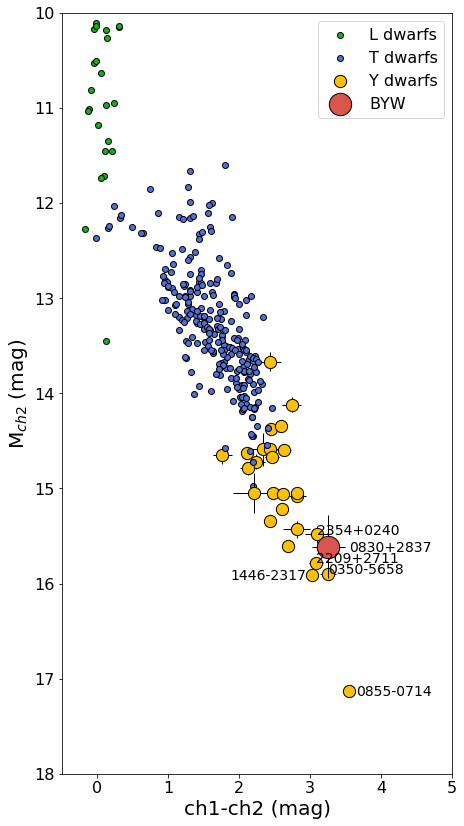

In [71]:
m = dl17plx[dl17plx['sptn'] < 20].index
l = dl17plx[(dl17plx['sptn'] < 30) & (dl17plx['sptn'] >= 20)].index
t = dl17plx[(dl17plx['sptn'] < 40) & (dl17plx['sptn'] >= 30)].index
tt = k19t7[(k19t7['sptn'] < 40) & (k19t7['sptn'] >= 30)].index
y = k19t7[k19t7['sptn'] >= 40].index
w0855 = k19t7[k19t7['Object'] == 'WISE0855-0714'].index

plt.figure(figsize=(7,14))
#plt.scatter(dl17plx.loc[m,'ch1-ch2'],dl17plx.loc[m,'Mch2'],marker='o', color=sns.xkcd_rgb['light grey'], edgecolor='k')#color=sns.xkcd_rgb['denim blue']
#plt.errorbar(dl17plx.loc[l,'ch1-ch2'],dl17plx.loc[l,'Mch2'],marker='o', xerr=dl17plx.loc[l,'ch1-ch2e'],yerr=dl17plx.loc[l,'Mch2e'],linestyle='None',zorder=1,ecolor='k',elinewidth=1)
plt.scatter(dl17plx.loc[l,'ch1-ch2'],dl17plx.loc[l,'Mch2'],marker='o', color=sns.xkcd_rgb['green'], edgecolor='k')#color=sns.xkcd_rgb['kelly green']
plt.scatter(dl17plx.loc[t,'ch1-ch2'],dl17plx.loc[t,'Mch2'],marker='o', color=sns.xkcd_rgb['cornflower blue'], edgecolor='k')#color=sns.xkcd_rgb['marigold']

plt.errorbar(k19t7.loc[y,'ch1-ch2'], k19t7.loc[y,'M_ch2'], xerr=k19t7.loc[y,'ch1-ch2e'], yerr=k19t7.loc[y,'M_ch2e'],linestyle='None',zorder=1,ecolor='k',elinewidth=1)
plt.scatter(k19t7.loc[y,'ch1-ch2'], k19t7.loc[y,'M_ch2'],marker='o', color=sns.xkcd_rgb['marigold'], edgecolor='k', s=150)#color=sns.xkcd_rgb['red']

plt.errorbar(hstphot.loc[1,'ch1-ch2'],Mch20830,xerr=hstphot.loc[1,'ch1-ch2e'],yerr=eMch20830,linestyle='None',zorder=1,ecolor='k',elinewidth=1)
plt.scatter(hstphot.loc[1,'ch1-ch2'],Mch20830, marker='o', color=sns.xkcd_rgb['pale red'], edgecolor='k', s=500, zorder=1)

plt.scatter(k19t7.loc[tt,'ch1-ch2'], k19t7.loc[tt,'M_ch2'],marker='o', color=sns.xkcd_rgb['cornflower blue'], edgecolor='k')#color=sns.xkcd_rgb['light orange']
CW1446 = plt.scatter(ch1ch21446,Mch21446,marker='o', color=sns.xkcd_rgb['marigold'], edgecolor='k', s=150)
#CW1935 = plt.scatter(ch1ch21935,Mch21935,marker='o', color=sns.xkcd_rgb['marigold'], edgecolor='k', s=150)
#plt.scatter(hstphot.loc[1,'ch1-ch2'],hstphot.loc[1,'Mch2'],marker='o', color=sns.xkcd_rgb['pale red'], edgecolor='k', s=500, zorder=1)

ch1ch2ext = k19t7[k19t7['ch1-ch2'] >= 2.9].index

plt.annotate('1446-2317',xy=(ch1ch21446-1.15,Mch21446+0.05),fontsize=14)
#plt.annotate('1935-1546',xy=(ch1ch21935+0.1,Mch21935+0.05),fontsize=14)
plt.annotate('0855-0714',xy=(k19t7.loc[w0855,'ch1-ch2']+0.1,k19t7.loc[w0855,'M_ch2']+0.05),fontsize=14)
plt.annotate(k19t7.loc[ch1ch2ext[0],'Object'].split('WISE')[1], xy=(k19t7.loc[ch1ch2ext[0],'ch1-ch2'], k19t7.loc[ch1ch2ext[0],'M_ch2']),fontsize=14)
plt.annotate(k19t7.loc[ch1ch2ext[2],'Object'].split('WISE')[1], xy=(k19t7.loc[ch1ch2ext[2],'ch1-ch2'], k19t7.loc[ch1ch2ext[2],'M_ch2']),fontsize=14)
plt.annotate(k19t7.loc[ch1ch2ext[3],'Object'].split('WISE')[1], xy=(k19t7.loc[ch1ch2ext[3],'ch1-ch2'], k19t7.loc[ch1ch2ext[3],'M_ch2']),fontsize=14)


#plt.annotate(hstphot.loc[0,'SOURCE'].split('WISE')[1],xy=(hstphot.loc[0,'ch1-ch2']-1.35,hstphot.loc[0,'Mch2']+0.15),fontsize=14)
plt.annotate(hstphot.loc[1,'SOURCE'].split('WISE')[1],xy=(hstphot.loc[1,'ch1-ch2']+0.3,Mch20830+0.05),fontsize=14)
#plt.annotate(hstphot.loc[2,'SOURCE'].split('WISE')[1],xy=(hstphot.loc[2,'ch1-ch2']+0.3,hstphot.loc[2,'Mch2']-0.05),fontsize=14)
#plt.annotate(hstphot.loc[3,'SOURCE'].split('WISE')[1],xy=(hstphot.loc[3,'ch1-ch2']+0.2,hstphot.loc[3,'Mch2']),fontsize=14)
#plt.annotate(hstphot.loc[4,'SOURCE'].split('WISE')[1],xy=(hstphot.loc[4,'ch1-ch2']-1.35,hstphot.loc[4,'Mch2']+0.05),fontsize=14)

plt.ylim(18,10)
plt.xlim(-0.5,5.0)
plt.xlabel('ch1-ch2 (mag)',fontsize=20)
plt.ylabel('M$_{ch2}$ (mag)',fontsize=20)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(['L dwarfs','T dwarfs','Y dwarfs', 'BYW'],fontsize=16)
plt.savefig('CMD_MH_ch1-ch2_Ydwarfs_test.jpg')

In [72]:
k19t7.loc[k19t7['ch1-ch2'] >= 2.9, ['Object','ch1-ch2','M_ch2']]

,Object,ch1-ch2,M_ch2
37,WISE0350-5658,3.25,15.90
80,WISE0855-0714,3.55,17.13
202,WISE2209+2711,3.08,15.78
226,WISE2354+0240,3.09,15.48


In [74]:
hstphot[['SOURCE','ch1-ch2','ch1-ch2e','Mch2','Mch2e']]

,SOURCE,ch1-ch2,ch1-ch2e,Mch2,Mch2e
0,WISE0014+7951,1.847,0.071,13.624000,0.313000
1,WISE0830+2837,3.252,0.233,15.613033,0.330481
2,WISE0830-6323,1.832,0.061,13.605000,0.309000
3,WISE1516+7217,2.175,0.098,14.078000,0.335000
4,WISE1525+6053,2.126,0.087,14.004000,0.326000


In [21]:
k19t7[(k19t7['Object'] == 'WISE2354+0240') | (k19t7['Object'] == 'WISE0350-5658') | (k19t7['Object'] == 'WISE2209+2711')]

,Object,spt,sptn,pi,pi_e,mu_tot,mu_tote,Ref,M_H,M_He,M_W1,M_W1e,M_W2,M_W2e,M_W3,M_W3e,M_ch1,M_ch1e,M_ch2,M_ch2e,v_tan,v_tan_e,H-W1,ch1-ch2,ch1-ch2e
37,WISE0350-5658,Y1,41.0,174.6,2.6,618.2,1.9,Table4,23.47,0.14,NaN,NaN,15.96,0.05,13.54,0.28,19.15,0.10,15.90,0.04,16.8,0.3,NaN,3.25,0.107703
202,WISE2209+2711,Y0:,40.0,161.6,2.4,1814.8,1.6,Table4,23.43,0.15,NaN,NaN,15.81,0.06,13.50,0.39,18.86,0.09,15.78,0.04,53.2,0.8,NaN,3.08,0.098489
226,WISE2354+0240,Y1,41.0,124.1,4.9,629.1,4.1,Table4,23.35,0.31,NaN,NaN,15.48,0.12,NaN,NaN,18.57,0.14,15.48,0.09,24.0,1.0,NaN,3.09,0.166433


In [22]:
k19t7

,Object,spt,sptn,pi,pi_e,mu_tot,mu_tote,Ref,M_H,M_He,M_W1,M_W1e,M_W2,M_W2e,M_W3,M_W3e,M_ch1,M_ch1e,M_ch2,M_ch2e,v_tan,v_tan_e,H-W1,ch1-ch2,ch1-ch2e
0,WISE0005+3737,T9,39.0,127.0,2.4,1034.0,2.0,Table4,18.50,0.05,17.28,0.10,13.81,0.05,12.30,0.24,15.95,0.05,13.80,0.04,38.6,0.7,1.22,2.15,0.064031
1,WISE0015-4615,T8,38.0,71.8,2.7,796.4,2.0,Table4,17.19,0.11,16.24,0.13,13.50,0.09,NaN,NaN,15.38,0.09,13.51,0.08,52.6,2.0,0.95,1.87,0.120416
2,WISE0032-4946,T8.5,38.5,63.6,2.9,938.2,2.4,Table4,17.89,0.17,16.69,0.19,14.09,0.12,11.22,0.36,15.95,0.11,13.95,0.10,69.9,3.2,1.20,2.00,0.148661
3,ULAS0034-0052,T8.5,38.5,68.7,1.4,359.2,0.8,1,17.67,0.06,16.19,0.14,13.73,0.08,NaN,NaN,15.42,0.06,13.68,0.05,24.8,0.5,1.48,1.74,0.078102
4,2MASS0034+0523,T6.5,36.5,120.1,3.0,697.5,2.5,Table4,15.95,0.06,15.49,0.07,12.95,0.06,12.18,0.32,14.49,0.06,12.98,0.06,27.5,0.7,0.46,1.51,0.084853
5,WISE0038+2758,T9,39.0,89.7,2.5,97.5,2.2,Table4,18.68,0.07,17.21,0.16,14.13,0.07,12.14,0.34,16.22,0.07,14.17,0.06,5.2,0.2,1.47,2.05,0.092195
6,Gl27B,T8,38.0,89.8,0.1,591.9,0.1,2,16.49,0.03,NaN,NaN,NaN,NaN,NaN,NaN,15.15,0.04,13.39,0.02,31.2,0.1,NaN,1.76,0.044721
7,WISE0040+0900,T7,37.0,69.8,1.5,74.5,2.2,Table6,15.78,0.05,15.20,0.08,13.05,0.07,NaN,NaN,14.29,0.05,12.98,0.05,5.1,0.2,0.58,1.31,0.070711
8,WISE0049+2151,T8.5,38.5,139.9,2.5,485.4,2.0,Table4,17.45,0.04,16.65,0.07,13.76,0.05,12.31,0.19,15.74,0.04,13.77,0.04,16.4,0.3,0.80,1.97,0.056569
9,2MASS0050-3322,T7,37.0,94.6,2.4,1485.1,2.1,1,15.92,0.11,15.48,0.07,13.46,0.06,11.71,0.25,14.75,0.06,13.47,0.06,74.4,1.9,0.44,1.28,0.084853


In [24]:
hstphot[['SOURCE','Mch2']]

,SOURCE,Mch2
0,WISE0014+7951,13.624
1,WISE0830+2837,16.180
2,WISE0830-6323,13.605
3,WISE1516+7217,14.078
4,WISE1525+6053,14.004


In [25]:
k19t7

,Object,spt,sptn,pi,pi_e,mu_tot,mu_tote,Ref,M_H,M_He,M_W1,M_W1e,M_W2,M_W2e,M_W3,M_W3e,M_ch1,M_ch1e,M_ch2,M_ch2e,v_tan,v_tan_e,H-W1,ch1-ch2,ch1-ch2e
0,WISE0005+3737,T9,39.0,127.0,2.4,1034.0,2.0,Table4,18.50,0.05,17.28,0.10,13.81,0.05,12.30,0.24,15.95,0.05,13.80,0.04,38.6,0.7,1.22,2.15,0.064031
1,WISE0015-4615,T8,38.0,71.8,2.7,796.4,2.0,Table4,17.19,0.11,16.24,0.13,13.50,0.09,NaN,NaN,15.38,0.09,13.51,0.08,52.6,2.0,0.95,1.87,0.120416
2,WISE0032-4946,T8.5,38.5,63.6,2.9,938.2,2.4,Table4,17.89,0.17,16.69,0.19,14.09,0.12,11.22,0.36,15.95,0.11,13.95,0.10,69.9,3.2,1.20,2.00,0.148661
3,ULAS0034-0052,T8.5,38.5,68.7,1.4,359.2,0.8,1,17.67,0.06,16.19,0.14,13.73,0.08,NaN,NaN,15.42,0.06,13.68,0.05,24.8,0.5,1.48,1.74,0.078102
4,2MASS0034+0523,T6.5,36.5,120.1,3.0,697.5,2.5,Table4,15.95,0.06,15.49,0.07,12.95,0.06,12.18,0.32,14.49,0.06,12.98,0.06,27.5,0.7,0.46,1.51,0.084853
5,WISE0038+2758,T9,39.0,89.7,2.5,97.5,2.2,Table4,18.68,0.07,17.21,0.16,14.13,0.07,12.14,0.34,16.22,0.07,14.17,0.06,5.2,0.2,1.47,2.05,0.092195
6,Gl27B,T8,38.0,89.8,0.1,591.9,0.1,2,16.49,0.03,NaN,NaN,NaN,NaN,NaN,NaN,15.15,0.04,13.39,0.02,31.2,0.1,NaN,1.76,0.044721
7,WISE0040+0900,T7,37.0,69.8,1.5,74.5,2.2,Table6,15.78,0.05,15.20,0.08,13.05,0.07,NaN,NaN,14.29,0.05,12.98,0.05,5.1,0.2,0.58,1.31,0.070711
8,WISE0049+2151,T8.5,38.5,139.9,2.5,485.4,2.0,Table4,17.45,0.04,16.65,0.07,13.76,0.05,12.31,0.19,15.74,0.04,13.77,0.04,16.4,0.3,0.80,1.97,0.056569
9,2MASS0050-3322,T7,37.0,94.6,2.4,1485.1,2.1,1,15.92,0.11,15.48,0.07,13.46,0.06,11.71,0.25,14.75,0.06,13.47,0.06,74.4,1.9,0.44,1.28,0.084853


In [26]:
k19t7.loc[y,['Mch1','Mch2','ch1-ch2']]

,Mch1,Mch2,ch1-ch2
13,NaN,NaN,2.43
24,NaN,NaN,2.34
25,NaN,NaN,2.21
35,NaN,NaN,2.63
37,NaN,NaN,3.25
38,NaN,NaN,2.23
40,NaN,NaN,2.47
50,NaN,NaN,2.74
61,NaN,NaN,2.82
63,NaN,NaN,2.45
